In [1]:
import pandas as pd 

In [2]:
train_df = pd .read_csv(r"C:\Users\poude\Downloads\train.csv")
test_df = pd.read_csv(r"C:\Users\poude\Downloads\test.csv")
gender_submission_df = pd.read_csv(r"C:\Users\poude\Downloads\gender_submission.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [8]:
%matplotlib inline

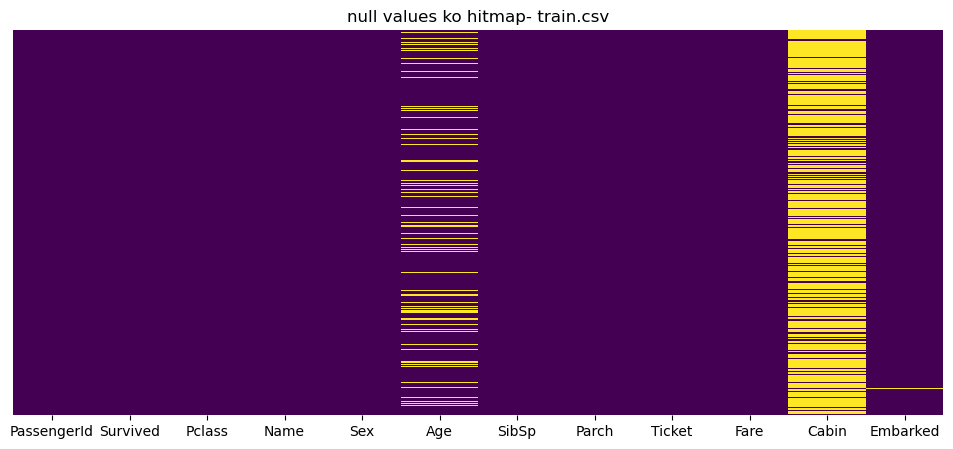

In [9]:
plt.figure(figsize=(12,5))
sns.heatmap(train_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.title("null values ko hitmap- train.csv")
plt.show()        #cbar -> heatmap ko color bar hatauxa , ylabel chai value=people haru ko , cmap = color change 


## Forget to check the shape

In [10]:
train_df.shape      #ok not that much data

(891, 12)

In [11]:
missing_counts = train_df.isnull().sum().sort_values(ascending=False)
missing_counts

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [12]:
missing_per = ((train_df.isnull().sum()/train_df.isnull().sum().sum())*100).sort_values(ascending=False)
missing_per

Cabin          79.330254
Age            20.438799
Embarked        0.230947
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64

# simple mean function pani use garna sakinxa

In [13]:
missing_pct = (train_df.isnull().mean()*100).sort_values(ascending=False)
missing_pct

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64

## missing dataframe ko herna sajilo huna lai table banam values rw per centage vako

In [14]:
missing_df = pd.DataFrame({
    "missing counts":missing_counts,
    "missing percentage":missing_per
})

In [15]:
missing_df

,missing counts,missing percentage
Cabin,687,79.330254
Age,177,20.438799
Embarked,2,0.230947
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [16]:
missing_df.reset_index().columns

Index(['index', 'missing counts', 'missing percentage'], dtype='object')

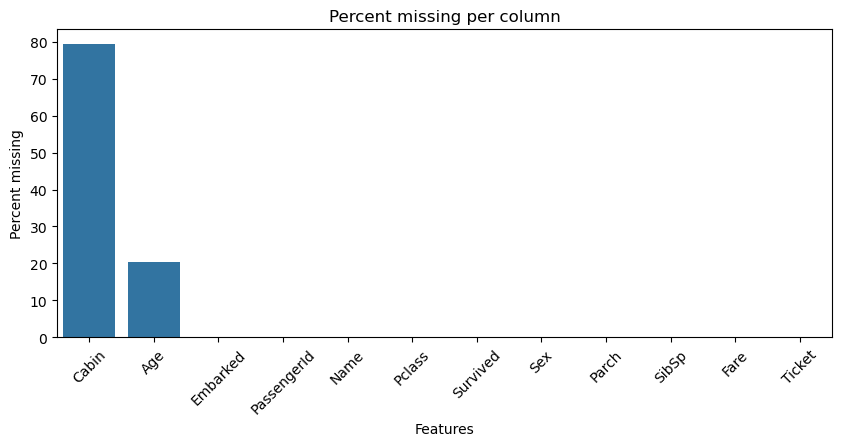

In [17]:
plt.figure(figsize=(10,4))
sns.barplot(x=missing_df.index, y="missing percentage", data=missing_df.reset_index())
plt.ylabel("Percent missing")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.title("Percent missing per column")
plt.show()


## lets remove the columns that have more than 20% to remove cabin and age

In [18]:
threshold = 20
feeatures_above_threshold = missing_df[missing_df['missing percentage']>threshold]

In [19]:
feeatures_above_threshold

,missing counts,missing percentage
Cabin,687,79.330254
Age,177,20.438799


In [20]:
## lets just check missing rows too 
rows_with_missing = train_df[train_df.isnull().any(axis=1)]
print("Number of rows with at least one missing:", len(rows_with_missing))
rows_with_missing.head()


Number of rows with at least one missing: 708


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [21]:
feeatures_above_threshold.index

Index(['Cabin', 'Age'], dtype='object')

In [22]:
null_removed_train_df = train_df.drop(columns=feeatures_above_threshold.index)

In [23]:
null_removed_train_df.shape

(891, 10)

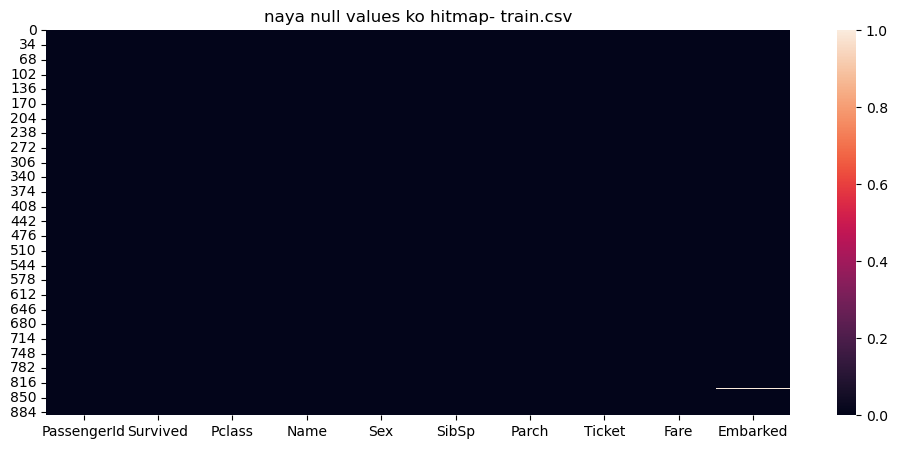

In [24]:
plt.figure(figsize=(12,5))
sns.heatmap(null_removed_train_df.isnull())
plt.title("naya null values ko hitmap- train.csv")
plt.show()

In [25]:
null_rows_check = null_removed_train_df.isnull().any(axis=1)
null_rows_check

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [26]:
null_rows_check.sum()

np.int64(2)

In [27]:
# To see the actual rows that still have nulls:
rows_with_nulls = null_removed_train_df[null_rows_check]  #ignores all false values of null rows check
rows_with_nulls

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,NaN


In [28]:
rowcol_null_removed_train_df = null_removed_train_df.drop(rows_with_nulls.index)
rowcol_null_removed_train_df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


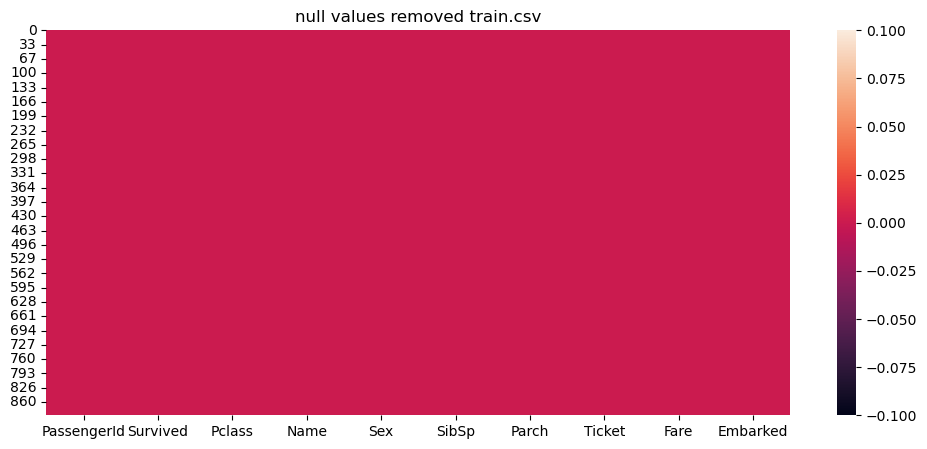

In [29]:
plt.figure(figsize=(12,5))
sns.heatmap(rowcol_null_removed_train_df.isnull())
plt.title("null values removed train.csv")
plt.show()

## let's use to fill the values of row insted of deleting rows as the train database is already too small

In [30]:
cleaned_titanic_df = null_removed_train_df.copy()
cleaned_titanic_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [31]:
mode_embarked=cleaned_titanic_df['Embarked'].mode()[0]  #selects s

In [32]:
cleaned_titanic_df['Embarked']=cleaned_titanic_df['Embarked'].fillna(mode_embarked)

In [33]:
cleaned_titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

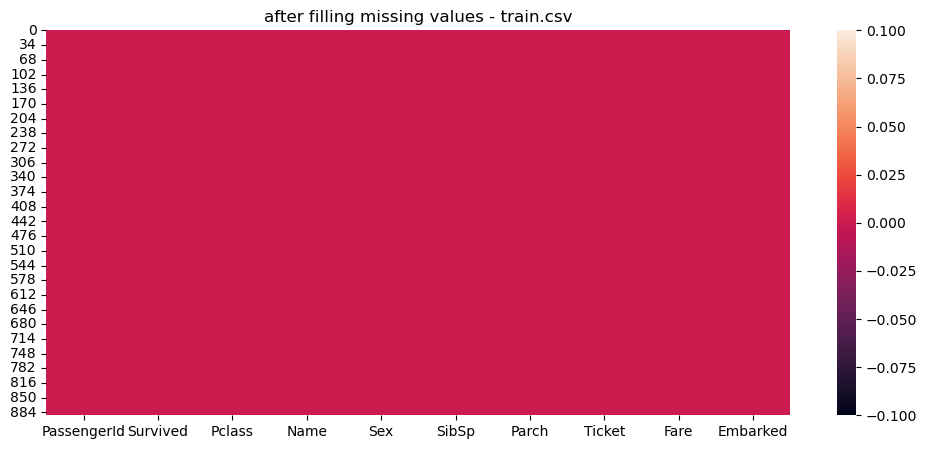

In [34]:
plt.figure(figsize=(12,5))
sns.heatmap(cleaned_titanic_df.isnull())
plt.title("after filling missing values - train.csv")
plt.show()

In [35]:
cleaned_titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [36]:
cleaned_titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [37]:
cleaned_titanic_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [38]:
cleaned_titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## now map the sex and embarked column as they are categorical object change to an order

In [39]:
sex_mapping = {
    "male":0,
    "female":1
}
embarked_mapping ={
    "S":0,
    "C":1,
    "Q":2
}
cleaned_titanic_df['Embarked']=cleaned_titanic_df['Embarked'].map(embarked_mapping)
cleaned_titanic_df['Sex']=cleaned_titanic_df['Sex'].map(sex_mapping)

In [40]:
cleaned_titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [41]:
features = cleaned_titanic_df.columns
features = list(features)
features.remove('Survived')

In [42]:
columns_to_remove = ['Survived','Name','Ticket']

In [43]:
x = cleaned_titanic_df.drop(columns=columns_to_remove)
y = cleaned_titanic_df['Survived']

In [44]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
model = LogisticRegression(max_iter=2000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [46]:
y_pred = model.predict(x_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.7821229050279329
Confusion Matrix:
 [[89 16]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(max_iter=1000), 
                         x, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.79329609 0.80337079 0.78089888 0.7752809  0.80898876]
Mean accuracy: 0.7923670830456343


## now using more ml models basic ones

In [48]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_val)

print("\n--- Random Forest ---")
print("Train Accuracy:", rf.score(x_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))



--- Random Forest ---
Train Accuracy: 1.0
Validation Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [50]:
# Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_val)

print("\n--- Support Vector Machine ---")
print("Train Accuracy:", svm.score(x_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))
print("Classification Report:\n", classification_report(y_val, y_pred_svm))



--- Support Vector Machine ---
Train Accuracy: 0.6530898876404494
Validation Accuracy: 0.5977653631284916
Confusion Matrix:
 [[103   2]
 [ 70   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179



In [51]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_val)

print("\n--- K-Nearest Neighbors ---")
print("Train Accuracy:", knn.score(x_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))
print("Classification Report:\n", classification_report(y_val, y_pred_knn))


--- K-Nearest Neighbors ---
Train Accuracy: 0.7415730337078652
Validation Accuracy: 0.6759776536312849
Confusion Matrix:
 [[90 15]
 [43 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76       105
           1       0.67      0.42      0.52        74

    accuracy                           0.68       179
   macro avg       0.68      0.64      0.64       179
weighted avg       0.68      0.68      0.66       179



In [52]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_val)

print("\n--- Decision Tree ---")
print("Train Accuracy:", dt.score(x_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_pred_dt))


--- Decision Tree ---
Train Accuracy: 1.0
Validation Accuracy: 0.7318435754189944
Confusion Matrix:
 [[82 23]
 [25 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       105
           1       0.68      0.66      0.67        74

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179



## i think that age shouldnt be removed 

In [53]:
missing_df

,missing counts,missing percentage
Cabin,687,79.330254
Age,177,20.438799
Embarked,2,0.230947
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [54]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
new_optimized_df = train_df.drop(columns='Cabin')

In [57]:
new_optimized_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


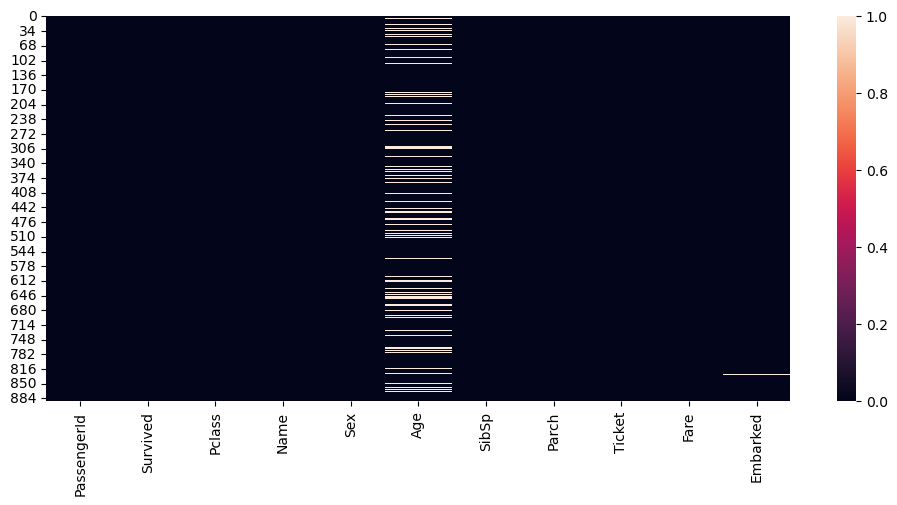

In [58]:
plt.figure(figsize=(12,5))
sns.heatmap(new_optimized_df.isnull())
plt.show()

In [59]:
new_optimized_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [60]:
new_optimized_df['Embarked']=new_optimized_df['Embarked'].fillna(new_optimized_df['Embarked'].mode()[0])
new_optimized_df['Age']=new_optimized_df['Age'].fillna(new_optimized['Age'].median())

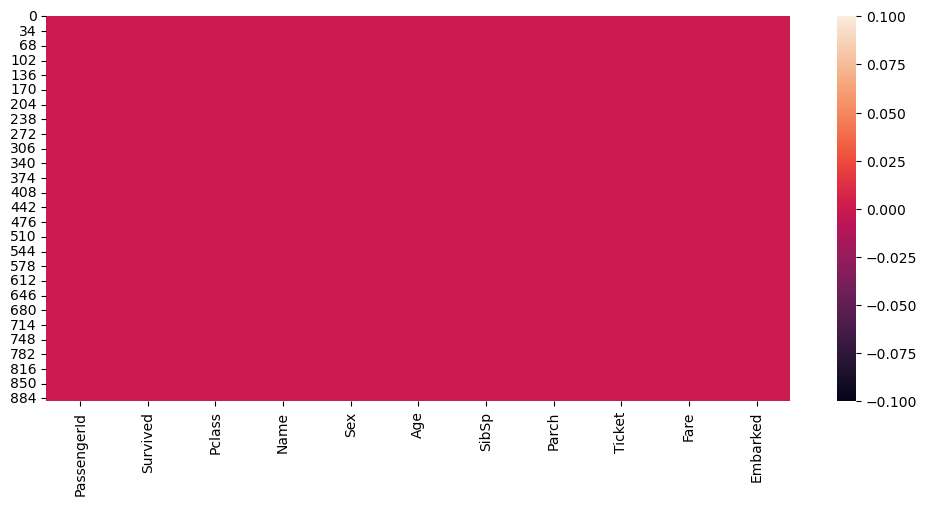

In [61]:
plt.figure(figsize=(12,5))
sns.heatmap(new_optimized_df.isnull())
plt.show()

In [64]:

sex_mapping = {
    "male":0,
    "female":1
}
embarked_mapping ={
    "S":0,
    "C":1,
    "Q":2
}
new_optimized_df['Embarked']=new_optimized_df['Embarked'].map(embarked_mapping)
new_optimized_df['Sex']=new_optimized_df['Sex'].map(sex_mapping)
opt_features = new_optimized_df.columns
opt_features = list(opt_features)
opt_features.remove('Survived')
columns_to_remove2 = ['Survived','Name','Ticket']
x = new_optimized_df.drop(columns=columns_to_remove2)
y = new_optimized_df['Survived']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=2000)
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Train Accuracy:", model.score(x_train, y_train))
scores = cross_val_score(LogisticRegression(max_iter=1000), 
                             x, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Train Accuracy: 0.8061797752808989
Cross-validation scores: [0.77653631 0.79213483 0.78651685 0.76966292 0.80898876]
Mean accuracy: 0.7867679367271359


In [65]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_val)

print("\n--- Random Forest ---")
print("Train Accuracy:", rf.score(x_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))



--- Random Forest ---
Train Accuracy: 1.0
Validation Accuracy: 0.8324022346368715
Confusion Matrix:
 [[93 12]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [66]:
# Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_val)

print("\n--- Support Vector Machine ---")
print("Train Accuracy:", svm.score(x_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))
print("Classification Report:\n", classification_report(y_val, y_pred_svm))



--- Support Vector Machine ---
Train Accuracy: 0.6530898876404494
Validation Accuracy: 0.5977653631284916
Confusion Matrix:
 [[103   2]
 [ 70   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179



In [67]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_val)

print("\n--- K-Nearest Neighbors ---")
print("Train Accuracy:", knn.score(x_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))
print("Classification Report:\n", classification_report(y_val, y_pred_knn))


--- K-Nearest Neighbors ---
Train Accuracy: 0.75
Validation Accuracy: 0.659217877094972
Confusion Matrix:
 [[88 17]
 [44 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.74       105
           1       0.64      0.41      0.50        74

    accuracy                           0.66       179
   macro avg       0.65      0.62      0.62       179
weighted avg       0.65      0.66      0.64       179



In [69]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_val)

print("\n--- Decision Tree ---")
print("Train Accuracy:", dt.score(x_train, y_train))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_pred_dt))


--- Decision Tree ---
Train Accuracy: 1.0
Validation Accuracy: 0.7430167597765364
Confusion Matrix:
 [[82 23]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       105
           1       0.69      0.69      0.69        74

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179

